# Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

# Load Data

In [2]:
dataset=pd.read_csv('OnlineRetail.csv',encoding='latin1') 
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Preprocessing

We are going to analysis the Customers based on below 3 factors:
+ R (Recency): Number of days since last purchase
+ F (Frequency): Number of tracsactions
+ M (Monetary): Total amount of transactions (revenue contributed)

In [5]:
# Add New attribute Amount
dataset['Amount']= dataset['Quantity']*dataset['UnitPrice']
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


Pandas datetimeindex provides efficient way to extract year, month or day from string format date.
docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html

You can also use the formula (dataset['InvoiceDate'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') to calculate unixtime

In [6]:
# Convert date to unixtime
dataset['InvoiceDate']= pd.to_datetime(dataset['InvoiceDate'])
dataset['InvoiceDate']=(dataset['InvoiceDate'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1263284760,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,1263284760,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1263284760,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1263284760,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1263284760,3.39,17850.0,United Kingdom,20.34


In [7]:
# Add New attribute Recency 
max_date=max(dataset['InvoiceDate'])
print(max_date)

1323537540


In [8]:
dataset['timeDiff']= max_date - dataset['InvoiceDate']
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,timeDiff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1263284760,2.55,17850.0,United Kingdom,15.30,60252780
1,536365,71053,WHITE METAL LANTERN,6,1263284760,3.39,17850.0,United Kingdom,20.34,60252780
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1263284760,2.75,17850.0,United Kingdom,22.00,60252780
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1263284760,3.39,17850.0,United Kingdom,20.34,60252780
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1263284760,3.39,17850.0,United Kingdom,20.34,60252780


In [9]:
# drop columns which are not used for segmentation
df = dataset.drop(['StockCode', 'Description','Quantity', 'UnitPrice','InvoiceDate'], axis=1)
df.head()

,InvoiceNo,CustomerID,Country,Amount,timeDiff
0,536365,17850.0,United Kingdom,15.30,60252780
1,536365,17850.0,United Kingdom,20.34,60252780
2,536365,17850.0,United Kingdom,22.00,60252780
3,536365,17850.0,United Kingdom,20.34,60252780
4,536365,17850.0,United Kingdom,20.34,60252780


In [10]:
# aggregate amount based on CustomerID
amt_df = df.groupby('CustomerID')['Amount'].sum()
amt_df.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [11]:
# get count of Invoices for the CustomerID
fre_df = df.groupby('CustomerID')['InvoiceNo'].count()
fre_df.head()


CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [12]:
# get most recent transation of the customer
rec_df = df.groupby('CustomerID')['timeDiff'].min() # last transaction
rec_df.head()

CustomerID
12346.0    28191720
12347.0     3473640
12348.0     6581160
12349.0     1668480
12350.0    26875080
Name: timeDiff, dtype: int64

In [13]:
# Create a dataframe with only required fields. We do this by merging the amt_df, fre_df and rec_df dataframe
data = pd.merge(amt_df,fre_df,on='CustomerID',how='inner')
data.head()

,Amount,InvoiceNo
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17


In [14]:
data = pd.merge(data,rec_df,on='CustomerID',how='inner')
data.head()

,Amount,InvoiceNo,timeDiff
CustomerID,,,
12346.0,0.00,2,28191720
12347.0,4310.00,182,3473640
12348.0,1797.24,31,6581160
12349.0,1757.55,73,1668480
12350.0,334.40,17,26875080


In [15]:
# Rename the columns to Frequency and Recency
data = data.rename(columns={"InvoiceNo": "Frequency", "timeDiff": "Recency"})
data.head()

,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,28191720
12347.0,4310.00,182,3473640
12348.0,1797.24,31,6581160
12349.0,1757.55,73,1668480
12350.0,334.40,17,26875080


In [16]:
# verify the data type
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables : \n'.format(len(numerical)), numerical)

There are 3 numerical variables : 
 ['Amount', 'Frequency', 'Recency']


In [17]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 0 categorical variables : 
 []


In [18]:
# view summary statistics in numerical variables
print(round(data[numerical].describe()),2)

         Amount  Frequency     Recency
count    4372.0     4372.0      4372.0
mean     1898.0       93.0   8740163.0
std      8219.0      232.0   9843610.0
min     -4288.0        1.0         0.0
25%       293.0       17.0   1743870.0
50%       648.0       42.0   4942830.0
75%      1612.0      102.0  13153965.0
max    279489.0     7983.0  60247560.0 2


In [19]:
# Check for Nan
data[data.isnull().any(axis=1)]

,Amount,Frequency,Recency
CustomerID,,,


# Build Model 

In [20]:
# Encoding data
from sklearn.preprocessing import StandardScaler
scaleddata = StandardScaler().fit_transform(data)

# K-means clustering

In [21]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

For n_clusters=2, the silhouette score is 0.9365515478616134
For n_clusters=3, the silhouette score is 0.5584945833214569
For n_clusters=4, the silhouette score is 0.5558001385436593
For n_clusters=5, the silhouette score is 0.5772357505539938
For n_clusters=6, the silhouette score is 0.5744879266161776
For n_clusters=7, the silhouette score is 0.5667643546501101
For n_clusters=8, the silhouette score is 0.4848148723023924
For n_clusters=9, the silhouette score is 0.48955526839359526
For n_clusters=10, the silhouette score is 0.4918815196697982
For n_clusters=11, the silhouette score is 0.491741610487633


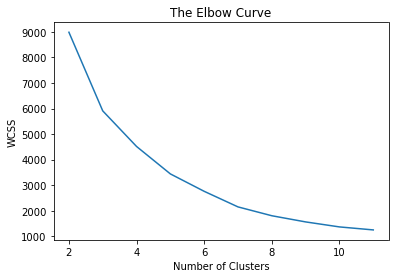

In [22]:
#for loop to run k means with different no of clusters. we will find WCSS for all of them. WSCC  =sum of square of the diff of each point to the centroid of the cluster. And draw graph with WCSS vs no of clusters
wcss=[]
for clusterCount in range(2,12):
    kmeans = KMeans(n_clusters=clusterCount, init='k-means++',random_state=42)
    kmeans.fit(scaleddata)
    wcss.append(kmeans.inertia_)#get wcss
    clusterLabels = kmeans.labels_
    silhouette_avg = silhouette_score(scaleddata,clusterLabels)
    print("For n_clusters={0}, the silhouette score is {1}".format(clusterCount, silhouette_avg))
plt.plot(range(2,12) # x axis
         ,wcss)    # y axis
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Max silhouette score is for 2 clusters. we pick the next highest score which is for 5 clusters.

In [23]:
cluster = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)
cluster.fit(scaleddata)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [24]:
cluster_labels=cluster.labels_
print(cluster_labels)

[1 3 3 ... 3 0 3]


In [25]:
score = silhouette_score(scaleddata, cluster_labels)
print(score)

0.5772357505539938


In [26]:
# Add cluster labels to preprocessed data 
data['kcluster']=cluster_labels
data.head()

,Amount,Frequency,Recency,kcluster
CustomerID,,,,
12346.0,0.00,2,28191720,1
12347.0,4310.00,182,3473640,3
12348.0,1797.24,31,6581160,3
12349.0,1757.55,73,1668480,3
12350.0,334.40,17,26875080,1


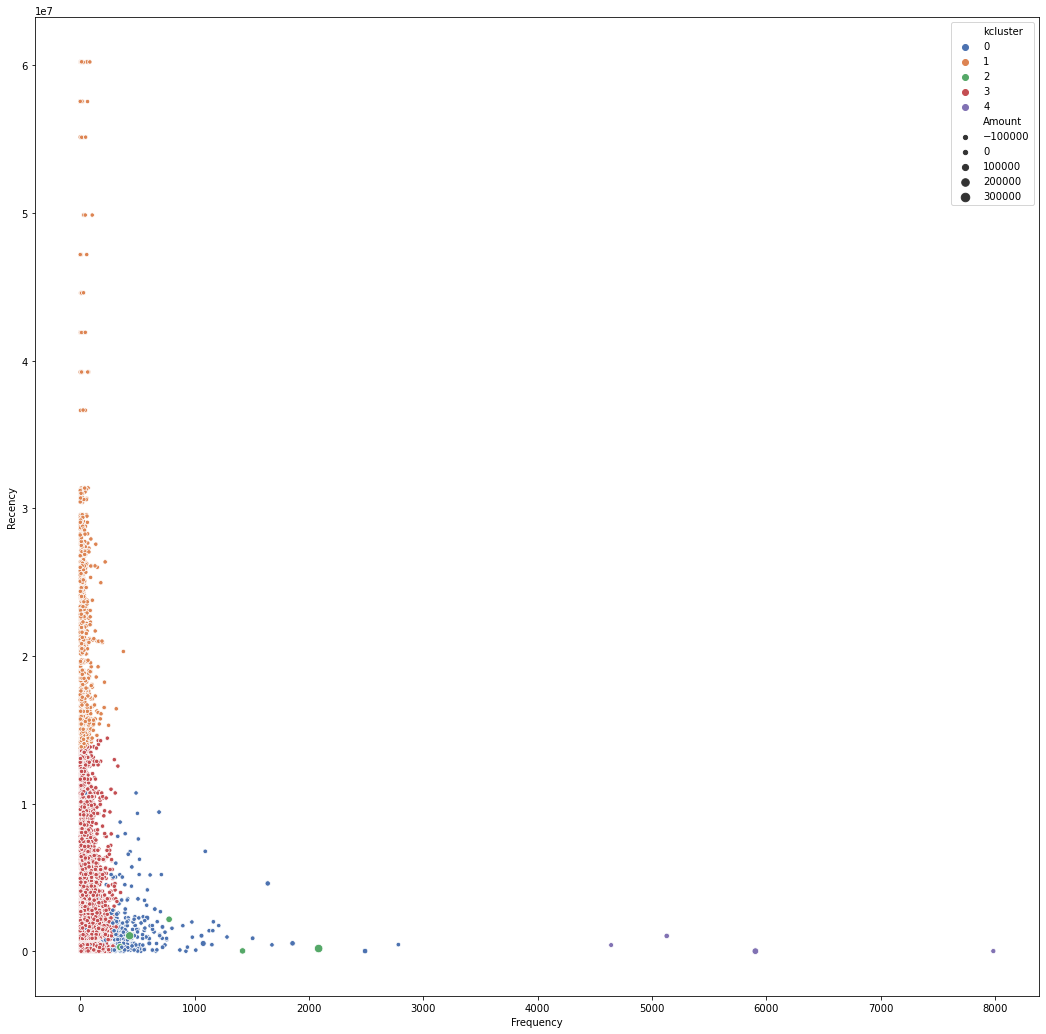

In [27]:
fig, ax = plt.subplots(figsize=(18,18))
sns.scatterplot(ax=ax, data=data, x="Frequency", y="Recency",size="Amount", hue="kcluster", palette="deep")

# Hierarchical clustering

In [28]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
connectivity = kneighbors_graph(scaleddata, n_neighbors=10, include_self=False)

In [29]:
model = AgglomerativeClustering(n_clusters=6, connectivity=connectivity,
                               linkage='ward')
model = model.fit(scaleddata)
cluster_labels=model.labels_
score = silhouette_score(scaleddata, cluster_labels)
print(score)

C:\Users\dennis\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


0.5352664572001194


In [30]:
# Add cluster labels to preprocessed data 
data['hcluster']=cluster_labels  
data.head()

,Amount,Frequency,Recency,kcluster,hcluster
CustomerID,,,,,
12346.0,0.00,2,28191720,1,2
12347.0,4310.00,182,3473640,3,1
12348.0,1797.24,31,6581160,3,1
12349.0,1757.55,73,1668480,3,1
12350.0,334.40,17,26875080,1,2


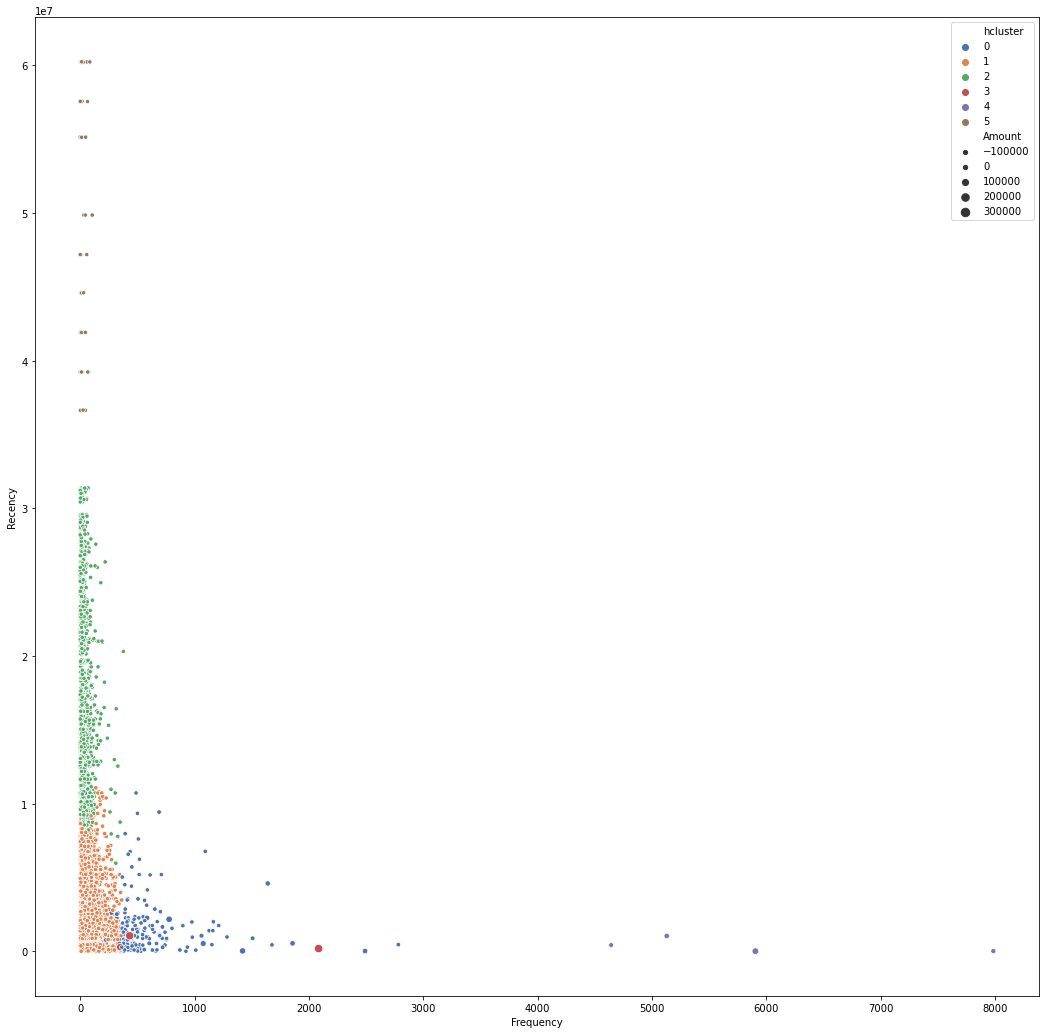

In [31]:
fig, ax = plt.subplots(figsize=(18,18))
sns.scatterplot(ax=ax, data=data, x="Frequency", y="Recency",size="Amount", hue="hcluster", palette="deep")

# MeanShift clustering

In [32]:
from sklearn.cluster import MeanShift

In [33]:
model = MeanShift(bandwidth=2)
model = model.fit(scaleddata)
cluster_labels=model.labels_
score = silhouette_score(scaleddata, cluster_labels)
print(score)

0.757644469091726


In [34]:
# Add cluster labels to preprocessed data 
data['acluster']=cluster_labels  
data.head()

,Amount,Frequency,Recency,kcluster,hcluster,acluster
CustomerID,,,,,,
12346.0,0.00,2,28191720,1,2,0
12347.0,4310.00,182,3473640,3,1,0
12348.0,1797.24,31,6581160,3,1,0
12349.0,1757.55,73,1668480,3,1,0
12350.0,334.40,17,26875080,1,2,0


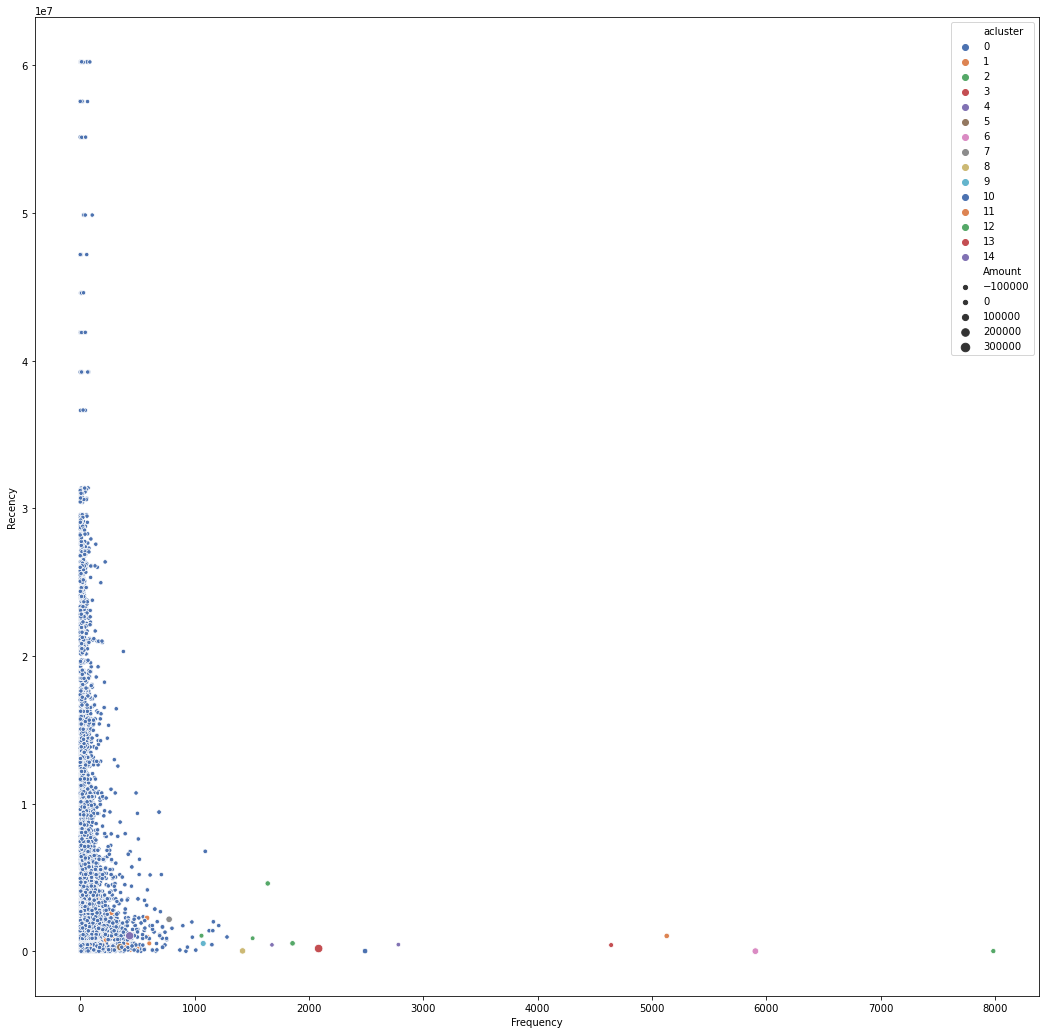

In [35]:
fig, ax = plt.subplots(figsize=(18,18))
sns.scatterplot(ax=ax, data=data, x="Frequency", y="Recency",size="Amount", hue="acluster", palette="deep")

# SpectralClustering

In [36]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=5,assign_labels="discretize", random_state=0)
model = model.fit(scaleddata)
cluster_labels=model.labels_

In [37]:
cluster_labels=model.labels_
score = silhouette_score(scaleddata, cluster_labels)
print(score)

0.8523868829014841


In [38]:
# Add cluster labels to preprocessed data 
data['scluster']=cluster_labels  
data.head()

,Amount,Frequency,Recency,kcluster,hcluster,acluster,scluster
CustomerID,,,,,,,
12346.0,0.00,2,28191720,1,2,0,0
12347.0,4310.00,182,3473640,3,1,0,0
12348.0,1797.24,31,6581160,3,1,0,0
12349.0,1757.55,73,1668480,3,1,0,0
12350.0,334.40,17,26875080,1,2,0,0


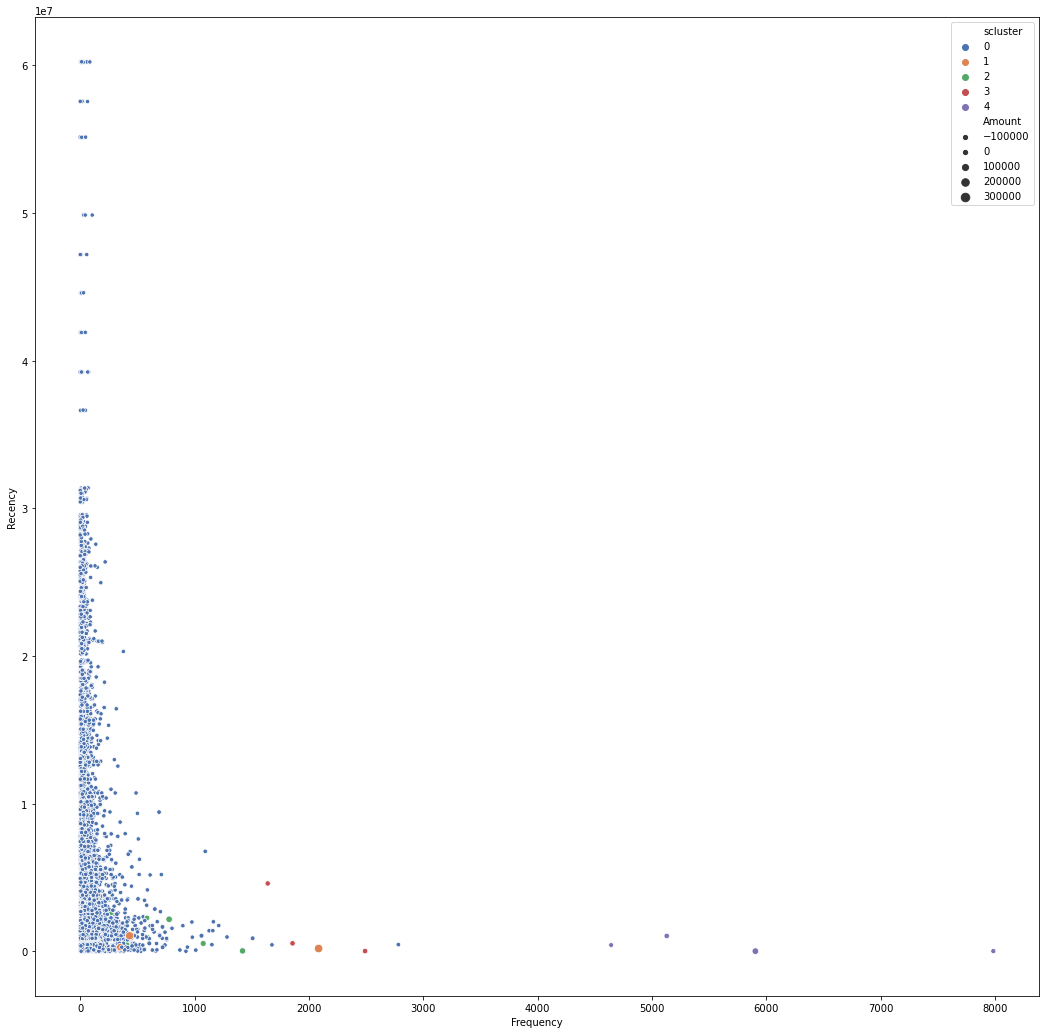

In [39]:
fig, ax = plt.subplots(figsize=(18,18))
sns.scatterplot(ax=ax, data=data, x="Frequency", y="Recency",size="Amount", hue="scluster", palette="deep")

# MiniBatchKMeans Clustering

In [40]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=5)
model = model.fit(scaleddata)

In [41]:
cluster_labels=model.labels_
score = silhouette_score(scaleddata, cluster_labels)
print(score)

0.22793704620724528


In [42]:
# Add cluster labels to preprocessed data 
data['mcluster']=cluster_labels  
data.head()

,Amount,Frequency,Recency,kcluster,hcluster,acluster,scluster,mcluster
CustomerID,,,,,,,,
12346.0,0.00,2,28191720,1,2,0,0,2
12347.0,4310.00,182,3473640,3,1,0,0,0
12348.0,1797.24,31,6581160,3,1,0,0,0
12349.0,1757.55,73,1668480,3,1,0,0,0
12350.0,334.40,17,26875080,1,2,0,0,2


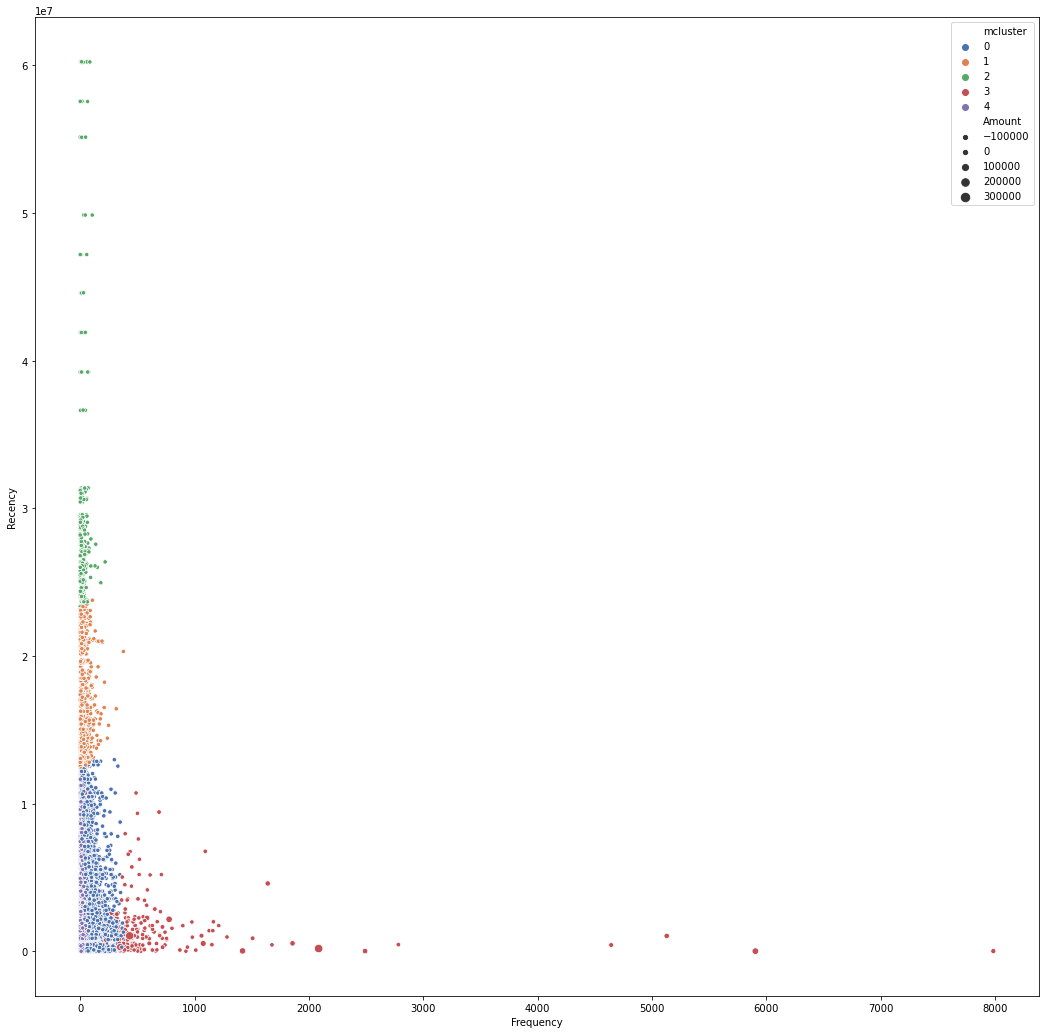

In [43]:
fig, ax = plt.subplots(figsize=(18,18))
sns.scatterplot(ax=ax, data=data, x="Frequency", y="Recency",size="Amount", hue="mcluster", palette="deep")

# DBSCAN Clustering

In [44]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=3)
model = model.fit(scaleddata)

In [45]:
cluster_labels=model.labels_
score = silhouette_score(scaleddata, cluster_labels)
print(score)

0.9316483366679077


In [46]:
# Add cluster labels to preprocessed data 
data['dcluster']=cluster_labels  
data.head()

,Amount,Frequency,Recency,kcluster,hcluster,acluster,scluster,mcluster,dcluster
CustomerID,,,,,,,,,
12346.0,0.00,2,28191720,1,2,0,0,2,0
12347.0,4310.00,182,3473640,3,1,0,0,0,0
12348.0,1797.24,31,6581160,3,1,0,0,0,0
12349.0,1757.55,73,1668480,3,1,0,0,0,0
12350.0,334.40,17,26875080,1,2,0,0,2,0


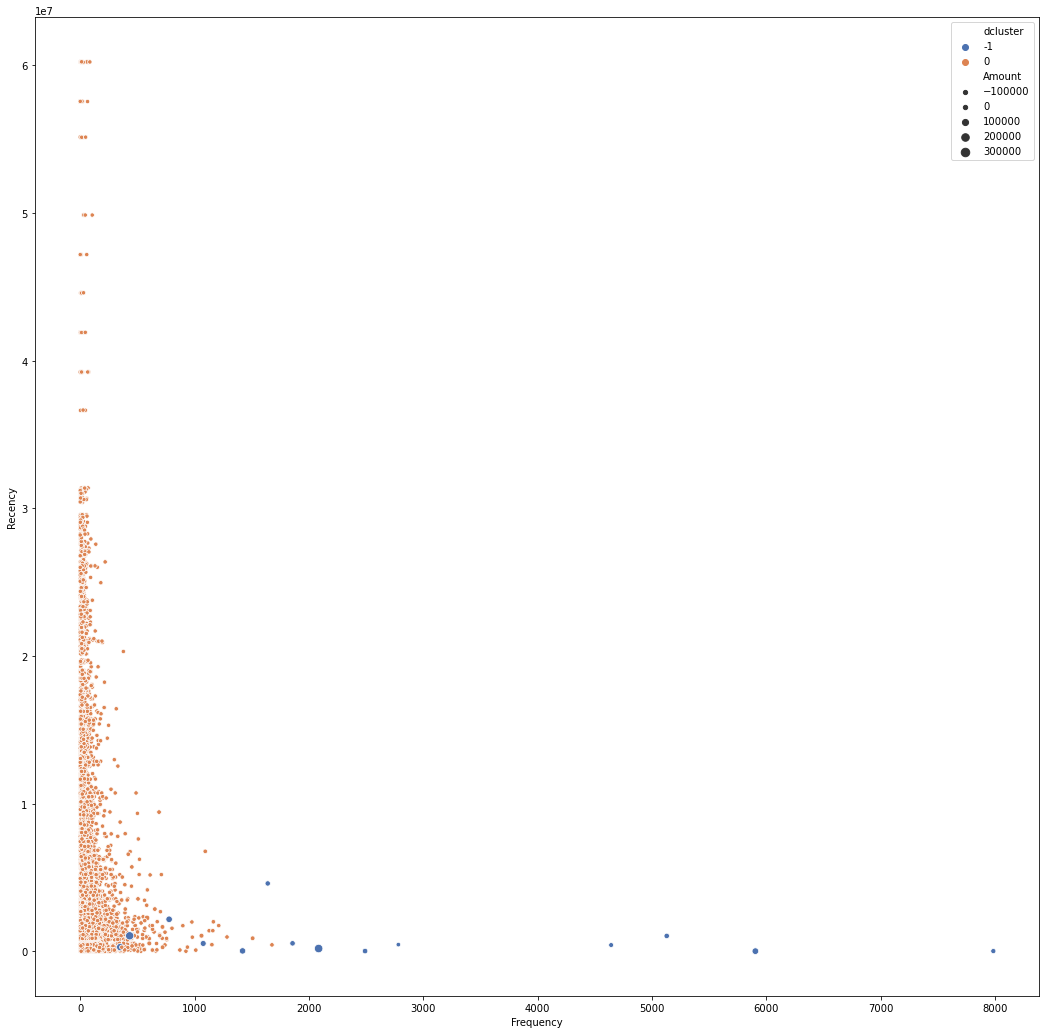

In [47]:
fig, ax = plt.subplots(figsize=(18,18))
sns.scatterplot(ax=ax, data=data, x="Frequency", y="Recency",size="Amount", hue="dcluster", palette="deep")